# Data Mining Final Project: Customer Behavioral Segmentation and Profiling

## Introduction

This project involves the analysis of a dataset related to a charity group. The dataset contains general information about the members and a list of their donations over a specific period, stored in two separate files named `BenefactorsData.csv` and `TransactionalData.csv`.

- `BenefactorsData.csv`: This file includes the membership ID, gender, State, date of birth, and how members became acquainted with the charity group.
- `TransactionalData.csv`: This file includes the unique transaction code along with the date and amount of the donation, and the type of donation made by each group member.

## Project Aim

The charity group is interested in using data science tools to design marketing strategies aimed at determining the appropriate target group and profiling the behavioral patterns of its members. The goal is to design and implement advertising campaigns. The expected outcomes of this project are:

1. **Segmentation of Members**: Based on donation history and behavioral indicators, members can be divided into several manageable groups. This segmentation will reveal the current behavioral patterns of the members.

2. **Target Market Identification**: By understanding the behavioral patterns, the charity group can select suitable behavioral patterns for campaign implementation.

3. **Profiling Members**: Exploring the relationship between initial member information (such as gender, age, etc.) and identified behavioral patterns. This profiling will provide insights into key characteristics of potential benefactors, helping the charity group in targeting and engaging with them effectively.

## Data Preprocessing

### Loading the Datasets

- **Reading the Datasets**: Load the `BenefactorsData.csv` and `TransactionalData.csv` files into pandas DataFrames.

### Transactional Data Processing

1. **Exploratory Data Analysis (EDA)**: Perform EDA to check data quality.
2. **Filter Transactions**:
   - Select transactions with `PaymentAmount` greater than 1000.
   - Select transactions with 'Membership Fee' in `SupportType`. Explain why this selection is important? 
3. **Aggregate Transactional Data**:
   - **First Stage**: Aggregate the data by `UserID` and `PaymentDate`.
   - **Second Stage**: Aggregate the results of the first stage by `UserID` to construct the `R`, `F`, and `M` fields:
     - `R` (Recency): The number of days since the last donation.
     - `F` (Frequency): The number of donations.
     - `M` (Monetary): The total amount donated.
   - **D** (Duration): The number of days between the first and last donation.
4. **EDA on Aggregated Data**: Perform EDA to check the quality indexes in the aggregated data and explore the distributions of `R`, `F`, `M`, and `D`.
5. **Categorize and Score `R`, `F`, `M`, and `D`**:
   - `R` (Recency):
     - 0 <= R < 60
     - 60 <= R < 180
     - 180 <= R < 365
     - 365 <= R < 545
     - R >= 545
   - `F` (Frequency):
     - 1 <= F < 2
     - 2 <= F < 5
     - 5 <= F < 10
     - 10 <= F < 20
     - F >= 20
   - `M` (Monetary):
     - 0 <= M < 500,000
     - 500,000 <= M < 1,200,000
     - 1,200,000 <= M < 2,500,000
     - 2,500,000 <= M < 10,000,000
     - M >= 10,000,000
   - `D` (Duration):
     - 0 <= D < 1
     - 1 <= D < 180
     - 180 <= D < 365
     - 365 <= D < 545
     - D >= 545

### Benefactors Data Processing

1. **EDA**: Perform EDA to check data quality.
2. **Extract and Calculate Age**:
   - Extract the year from `BirthDate`.
   - Calculate the age of each customer by subtracting the birth year from the maximum year of the transaction date.
   - Explain an idea to calculate a more accurate age for each customer.
   - Categorize `Age` into four categories:
     - 0-20
     - 20-35
     - 35-50
     - Age>=50
3. **State Classification**: Classify `State` into three categories:
   - Tehran
   - Alborz
   - Other

### Handling Missing Values

- Fill or remove missing values to ensure the dataset is complete.

## Data Modeling

1. **Clustering Model**: Perform a clustering model on the `R`, `F`, `M`, and `D` fields.
   - Explore the clusters and describe customer behavioral patterns.
   - Choose a pattern as a target group and construct a binary target field for each customer based on that pattern.

## Post-Processing

1. **Merge Datasets**: Merge the two datasets over `UserID`.
2. **Customer Profiling**:
   - Perform customer profiling using statistical hypothesis testing and if-then rules.
   - Identify the characteristics of the target group of customers.

## Conclusions and Recommendations

Based on the analysis and segmentation, the charity group can derive the following conclusions and recommendations:

1. **Effective Segmentation**: Members are segmented into distinct groups based on their donation behavior, providing a clear understanding of different behavioral patterns.
2. **Target Market Identification**: Accurate identification of target groups for campaign implementation, enhancing the effectiveness of marketing strategies.
3. **Member Profiling**: Profiling members based on their general characteristics and donation behavior, offering valuable insights into the key traits of potential benefactors.

The processed data and insights gained from this analysis will help the charity group in designing targeted marketing strategies and implementing successful advertising campaigns.


# Reading data 

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/customer-behavioral-segmentation-and-profiling/BenefactorsData.csv')
df = df.drop(df.columns[0], axis=1)
df.info()
print(50*'-')
df2 = pd.read_csv('/kaggle/input/customer-behavioral-segmentation-and-profiling/TransactionalData.csv')
df2 = df2.drop(df2.columns[0], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278386 entries, 0 to 278385
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   UserID          278386 non-null  int64 
 1   Gender          278149 non-null  object
 2   State           278386 non-null  object
 3   BirthDate       221817 non-null  object
 4   ReferralSource  278386 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.6+ MB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490797 entries, 0 to 1490796
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   TransID        1490797 non-null  int64 
 1   UserID         1490797 non-null  int64 
 2   PaymentDate    1490797 non-null  object
 3   PaymentAmount  1490797 non-null  int64 
 4   SupportType    1490797 non-null  object
dtypes: int64(3), object(2)
memory usage: 56.9

# EDA Y data profiling

In [2]:
#!pip install ydata_profiling

In [3]:
# from ydata_profiling import ProfileReport

# # Generate a profile report
# profile = ProfileReport(df, title="B data EDA", type_schema = {"Gender": "categorical", "State": "categorical","ReferralSource": "categorical"})

# # Save the report to an HTML file
# profile.to_file("B_profile_report.html")

In [4]:
# from ydata_profiling import ProfileReport

# # Generate a profile report
# profile = ProfileReport(df2, title="T data EDA")

# # Save the report to an HTML file
# profile.to_file("T_profile_report.html")

# Missing values report

In [5]:
import pandas as pd

# Assuming you already have your DataFrame named 'train_outprep_no_missing_fix'
def missing_values_report(df):
    # Calculate the number of missing values per column
    missing_count = df.isnull().sum()
    
    # Calculate the percentage of missing values per column
    missing_percentage = (missing_count / len(df)) * 100
    
    # Create a DataFrame to hold the results for columns
    missing_report = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percentage
    })
    
    # Filter out columns with no missing values (optional)
    missing_report = missing_report[missing_report['Missing Values'] > 0]
    
    # Sort the report by the number of missing values
    missing_report = missing_report.sort_values(by='Missing Values', ascending=False)
    
    # Calculate how many rows have missing values equal or greater than half of the columns
    half_columns = (df.shape[1] - 1) / 2
    rows_with_many_nulls = df.isnull().sum(axis=1) >= half_columns
    rows_with_many_nulls_count = rows_with_many_nulls.sum()
    
    # Display the report for columns
    print("Missing Values Report (Columns):")
    print(missing_report)
    print(50 * '-')
    
    # Display the DataFrame info
    print("DataFrame Info:")
    print(df.info())
    print(50 * '-')
    
    # Display the number of rows with many null values
    print(f"Number of rows with missing values in at least half the columns: {rows_with_many_nulls_count}")

# Generate the missing values report
report = missing_values_report(df)

Missing Values Report (Columns):
           Missing Values  Percentage
BirthDate           56569   20.320347
Gender                237    0.085134
--------------------------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278386 entries, 0 to 278385
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   UserID          278386 non-null  int64 
 1   Gender          278149 non-null  object
 2   State           278386 non-null  object
 3   BirthDate       221817 non-null  object
 4   ReferralSource  278386 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.6+ MB
None
--------------------------------------------------
Number of rows with missing values in at least half the columns: 111


# Filter data 

## Selection of 'Membership Fee' Transactions

The code to select transactions with 'Membership Fee' in `SupportType` filters the DataFrame to focus exclusively on transactions where customers paid for memberships. This selection is important because:

- **Customer Insights**: Analyzing only 'Membership Fee' transactions helps understand the behavior and characteristics of customers who are committed to ongoing memberships, which is crucial for evaluating the success and engagement level of membership programs.
- **Targeted Marketing**: Identifying and analyzing these transactions allows for targeted marketing strategies to enhance membership retention, tailor promotions, and improve customer loyalty.
- **Revenue Analysis**: It provides insights into the revenue generated specifically from membership fees, helping in financial forecasting and resource allocation.


In [6]:
import pandas as pd

# Assuming df is your DataFrame
# Select transactions with PaymentAmount greater than 1000
df2 = df2[df2['PaymentAmount'] > 1000]

# Further filter transactions with 'Membership Fee' in SupportType
df2 = df2[df2['SupportType'] == 'Membership Fee']

# Display the first few rows to verify
print(df2.head())
df2.info()

   TransID  UserID PaymentDate  PaymentAmount     SupportType
0   850001  174731  2016-03-20         200000  Membership Fee
2   850003  145833  2016-03-20          50000  Membership Fee
3   850004  177032  2016-03-20          22000  Membership Fee
4   850005  147147  2016-03-20          50000  Membership Fee
5   850006  113029  2016-03-20         200000  Membership Fee
<class 'pandas.core.frame.DataFrame'>
Index: 1021503 entries, 0 to 1490795
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   TransID        1021503 non-null  int64 
 1   UserID         1021503 non-null  int64 
 2   PaymentDate    1021503 non-null  object
 3   PaymentAmount  1021503 non-null  int64 
 4   SupportType    1021503 non-null  object
dtypes: int64(3), object(2)
memory usage: 46.8+ MB


# Recency , Frequency , Monetary , Duration

In [7]:
# Create first_stage DataFrame
first_stage = df2.groupby(['UserID', 'PaymentDate']).agg({
    'PaymentAmount': 'sum',
    'TransID': 'count'
}).reset_index()

# Rename the 'TransID' column to 'Frequency'
first_stage.rename(columns={'TransID': 'Frequency'}, inplace=True)

# Convert 'PaymentDate' to datetime
first_stage['PaymentDate'] = pd.to_datetime(first_stage['PaymentDate'], format='%Y-%m-%d')

# Calculate the maximum Date from the transaction dates 
max_transaction_date = first_stage['PaymentDate'].max()

# Calculate RFM metrics
agg_df = first_stage.groupby('UserID').agg(
    Recency=('PaymentDate', lambda x: (max_transaction_date - x.max()).days),
    Frequency=('Frequency', 'count'),
    Monetary=('PaymentAmount', 'sum'),
    Duration=('PaymentDate', lambda x: (x.max() - x.min()).days)
)

# Display the result
print(agg_df)
complete_agg_df = agg_df

        Recency  Frequency  Monetary  Duration
UserID                                        
0           360          2    800000       365
1            85          1    150000         0
3           216          7    290000       542
5           434          1  10000000         0
11          824          1    200000         0
...         ...        ...       ...       ...
278376        1          1     10000         0
278377        0          1     10000         0
278378        0          1     50000         0
278379        0          1     20000         0
278383       14          1    900000         0

[94278 rows x 4 columns]


## Categorization and Scoring of Recency, Frequency, Monetary, and Duration

The data has been categorized and scored based on four key metrics: Recency, Frequency, Monetary value, and Duration. This categorization helps in analyzing customer behavior and segmenting them for targeted marketing strategies.

### Recency (R)
Recency measures how recently a customer has made a transaction:
- Customers are grouped into five categories based on the number of days since their last transaction.
- A lower score indicates more recent transactions, with scores ranging from `5` (most recent) to `1` (least recent).

### Frequency (F)
Frequency tracks how often a customer makes transactions:
- Customers are categorized based on the number of transactions they have made.
- A higher score reflects more frequent transactions, with scores ranging from `1` (least frequent) to `5` (most frequent).

### Monetary (M)
Monetary value represents the total amount spent by the customer:
- Spending is divided into five categories.
- Higher scores indicate greater spending, with scores ranging from `1` (lowest spend) to `5` (highest spend).

### Duration (D)
Duration measures how long a customer has been engaged:
- Customers are grouped based on the length of their engagement in days.
- Longer engagement is reflected with higher scores, ranging from `1` (shortest duration) to `5` (longest duration).

These scores provide a detailed profile of each customer, which is crucial for identifying key segments and designing effective marketing strategies.


In [8]:
##### # Define bins and labels for Recency
recency_bins = [0, 60, 180, 365, 545, float('inf')]
recency_labels = ['5', '4', '3', '2', '1']

# Define bins and labels for Frequency
frequency_bins = [1, 2, 5, 10, 20, float('inf')]
frequency_labels = ['1', '2', '3', '4', '5']

# Define bins and labels for Monetary
monetary_bins = [0, 500000, 1200000, 2500000, 10000000, float('inf')]
monetary_labels = ['1', '2', '3', '4', '5']

# Define bins and labels for Duration
duration_bins = [0, 1, 180, 365, 545, float('inf')]
duration_labels = ['1', '2', '3', '4', '5']

# Categorize and score each column
complete_agg_df['R_Score'] = pd.cut(complete_agg_df['Recency'], bins=recency_bins, labels=recency_labels, right=False)
complete_agg_df['F_Score'] = pd.cut(complete_agg_df['Frequency'], bins=frequency_bins, labels=frequency_labels, right=False)
complete_agg_df['M_Score'] = pd.cut(complete_agg_df['Monetary'], bins=monetary_bins, labels=monetary_labels, right=False)
complete_agg_df['D_Score'] = pd.cut(complete_agg_df['Duration'], bins=duration_bins, labels=duration_labels, right=False)

# Display the DataFrame with the new scores
print(complete_agg_df)
complete_agg_df.info()

        Recency  Frequency  Monetary  Duration R_Score F_Score M_Score D_Score
UserID                                                                        
0           360          2    800000       365       3       2       2       4
1            85          1    150000         0       4       1       1       1
3           216          7    290000       542       3       3       1       4
5           434          1  10000000         0       2       1       5       1
11          824          1    200000         0       1       1       1       1
...         ...        ...       ...       ...     ...     ...     ...     ...
278376        1          1     10000         0       5       1       1       1
278377        0          1     10000         0       5       1       1       1
278378        0          1     50000         0       5       1       1       1
278379        0          1     20000         0       5       1       1       1
278383       14          1    900000         0      

# Frequency of RFMD scores

In [9]:
import pandas as pd


# Count the number of rows for each unique score
r_score_counts = complete_agg_df['R_Score'].value_counts().reset_index()
r_score_counts.columns = ['R_Score', 'Count']

f_score_counts = complete_agg_df['F_Score'].value_counts().reset_index()
f_score_counts.columns = ['F_Score', 'Count']

m_score_counts = complete_agg_df['M_Score'].value_counts().reset_index()
m_score_counts.columns = ['M_Score', 'Count']

d_score_counts = complete_agg_df['D_Score'].value_counts().reset_index()
d_score_counts.columns = ['D_Score', 'Count']

# Combine the counts into a final summary DataFrame
summary_df = pd.concat([
    r_score_counts.set_index('R_Score'),
    f_score_counts.set_index('F_Score'),
    m_score_counts.set_index('M_Score'),
    d_score_counts.set_index('D_Score')
], axis=1)

# Rename the columns for clarity
summary_df.columns = ['R_Score_Count', 'F_Score_Count', 'M_Score_Count', 'D_Score_Count']

# Reset index to have a clean DataFrame
summary_df = summary_df.reset_index()

# Display the results
print(summary_df)

  index  R_Score_Count  F_Score_Count  M_Score_Count  D_Score_Count
0     5          28665          13398           5373          24942
1     4          18785          12846          15870          12527
2     3          16548          14696          13324          14361
3     2          16131          25412          18515          14522
4     1          14149          27926          41196          27926


# Calculation of the birth year

## Explanation of Age Calculation and Categorization Code

This code performs several data processing steps on a DataFrame, focusing on calculating and categorizing customer ages based on their birthdates and transaction dates.




In [10]:

#df = df.dropna(subset=['BirthDate'])
# Extract the year from BirthDate
df['BirthYear'] = df['BirthDate'].str.split('-').str[0].astype(float)

# Convert the solar calendar year to Christian calendar year (Iranian to Gregorian)
df['BirthYear'] = df['BirthYear'] + 621

# Assume the maximum year of the transaction date
df2['PaymentDate'] = pd.to_datetime(df2['PaymentDate'])

# Extract the year from PaymentDate
df2['PaymentYear'] = df2['PaymentDate'].dt.year

# Find the maximum year
max_transaction_year = df2['PaymentYear'].max()
# Calculate the age
df['Age'] = max_transaction_year - df['BirthYear']



In [11]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming you have already created the DataFrame 'df'

# Categorize Age into specified categories
age_bins = [0, 20, 35, 50, float('inf')]
age_labels = ['0-20', '20-35', '35-50', '50+']

# Create a new column 'AgeCategory' without filling NaN values
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Create a numerical representation of AgeCategory
age_mapping = {label: index for index, label in enumerate(['0-20', '20-35', '35-50', '50+'])}
num_age_category = df['AgeCategory'].map(age_mapping)

# Initialize and fit the KNN Imputer
imputer = KNNImputer(n_neighbors=3)
imputed_age_categories = imputer.fit_transform(num_age_category.values.reshape(-1, 1))

# Map the imputed numerical values back to labels
imputed_age_categories_labels = [list(age_mapping.keys())[int(i)] for i in imputed_age_categories.flatten()]

# Update the AgeCategory with imputed values
df['AgeCategory'].fillna(pd.Series(imputed_age_categories_labels), inplace=True)

# Display the final DataFrame with imputed values
print(df)

        UserID Gender  State   BirthDate  ReferralSource  BirthYear   Age  \
0            3     زن  تهران  1363-08-16   Acquaintances     1984.0  34.0   
1            8    مرد  تهران  1364-06-24   Acquaintances     1985.0  33.0   
2           14    مرد  تهران  1356-07-07   Acquaintances     1977.0  41.0   
3           17     زن  تهران  1325-07-23   Acquaintances     1946.0  72.0   
4           18     زن  تهران  1334-10-06   Acquaintances     1955.0  63.0   
...        ...    ...    ...         ...             ...        ...   ...   
278381  262139    مرد  تهران  1357-04-10     Application     1978.0  40.0   
278382  262140    مرد  تهران  1354-10-01     Application     1975.0  43.0   
278383  262141    مرد   فارس  1373-05-31     Application     1994.0  24.0   
278384  262142     زن  البرز         NaN  Advertisements        NaN   NaN   
278385  262143    مرد  تهران  1350-01-12        Agencies     1971.0  47.0   

       AgeCategory  
0            20-35  
1            20-35  
2           

/tmp/ipykernel_18/1521041575.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeCategory'].fillna(pd.Series(imputed_age_categories_labels), inplace=True)


# State Classification and Translation to English

This code defines a function to classify the `State` column into three categories: 'Tehran', 'Alborz', or 'Other'. It then applies this function to create a new column `StateCategory` in the DataFrame, categorizing each state accordingly.


In [12]:
# State Classification
def classify_state(state):
    if state == 'تهران':
        return 'Tehran'
    elif state == 'البرز':
        return 'Alborz'
    else:
        return 'Other'

df['StateCategory'] = df['State'].apply(classify_state)


# Translating gender values to English 

In [13]:

def classify_gender(gender):
    if gender == 'زن':
        return 'Female'
    elif  gender == 'مرد':
        return 'Male'
        

df['Gender'] = df['Gender'].apply(classify_gender)

# Droping same columns

In [14]:
df = df.drop(['State','BirthDate' , 'BirthYear' , 'Age'], axis=1)

In [15]:
# Count the number of rows for each unique AgeCategory
age_category_counts = df['AgeCategory'].value_counts().reset_index()
age_category_counts.columns = ['AgeCategory', 'Count']

# Display the results
print(age_category_counts)

  AgeCategory   Count
0       20-35  130149
1       35-50   90319
2         50+   51542
3        0-20    6376


## Filling Missing Values in the Gender Column

This code snippet addresses missing values in the `Gender` column of a DataFrame (`df`) by replacing them with the most frequently occurring gender.

In [16]:
most_frequent_gender = df['Gender'].mode()[0]
df['Gender'].fillna(most_frequent_gender, inplace=True)

/tmp/ipykernel_18/3398472401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(most_frequent_gender, inplace=True)


# Droping 
the records which are still null and they have not been imputed by chance

In [17]:
df = df.dropna(subset=['Gender' , 'AgeCategory'])

# Missing values report after imputation

In [18]:
import pandas as pd

# Assuming you already have your DataFrame named 'train_outprep_no_missing_fix'
def missing_values_report(df):
    # Calculate the number of missing values per column
    missing_count = df.isnull().sum()
    
    # Calculate the percentage of missing values per column
    missing_percentage = (missing_count / len(df)) * 100
    
    # Create a DataFrame to hold the results
    missing_report = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percentage
    })
    
    # Filter out columns with no missing values (optional)
    missing_report = missing_report[missing_report['Missing Values'] > 0]
    
    # Sort the report by the number of missing values
    missing_report = missing_report.sort_values(by='Missing Values', ascending=False)
    
    return missing_report

# Generate the missing values report
report = missing_values_report(df)

# Display the report
print(report)
print(50*'-')
print(df.info())

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278386 entries, 0 to 278385
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   UserID          278386 non-null  int64   
 1   Gender          278386 non-null  object  
 2   ReferralSource  278386 non-null  object  
 3   AgeCategory     278386 non-null  category
 4   StateCategory   278386 non-null  object  
dtypes: category(1), int64(1), object(3)
memory usage: 8.8+ MB
None


## Insights from Each Cluster

1. **Cluster 1**:
   - **Recency**: Low average and median recency indicate that customers are very active.
   - **Frequency**: High frequency suggests these customers purchase often.
   - **Monetary**: Very high average and median monetary values indicate they are highly valuable customers.
   - **Duration**: Long engagement duration reflects loyalty.

   **Conclusion**: Cluster 1 represents the most valuable customers who are frequently engaged and spend significantly.

2. **Cluster 2**:
   - **Recency**: Higher recency indicates these customers are less active.
   - **Frequency**: Low frequency suggests infrequent purchases.
   - **Monetary**: Moderate monetary values indicate they are not as valuable as Cluster 0.
   - **Duration**: Very short duration suggests these customers may be new or not retained.

   **Conclusion**: Customers in Cluster 2 are less valuable and may require re-engagement strategies.

3. **Cluster 0**:
   - **Recency**: Moderate recency indicates some level of activity.
   - **Frequency**: Moderate frequency suggests occasional purchases.
   - **Monetary**: Similar monetary values to Cluster 1 but with higher frequency.
   - **Duration**: Reasonable duration indicates they have been around for some time.

   **Conclusion**: Cluster 0 represents moderately valuable customers who could be nurtured for higher engagement.

4. **Cluster 3**:
   - **Recency**: Very high recency indicates low engagement.
   - **Frequency**: Low frequency suggests infrequent purchases.
   - **Monetary**: Moderate monetary values indicate they are not high spenders.
   - **Duration**: Short duration reflects a lack of engagement.

   **Conclusion**: Cluster 3 customers are likely at risk of churning and may need targeted retention efforts.

5. **Cluster 4**:
   - **Recency**: High recency indicates low activity.
   - **Frequency**: Moderate frequency suggests occasional purchases.
   - **Monetary**: High monetary values indicate potential value but low engagement.
   - **Duration**: Reasonable duration suggests they have been around but are not active.

   **Conclusion**: Cluster 4 customers have potential value but need re-engagement to increase activity.

## Step 3: Recommendations

1. **Enhance Engagement for Cluster 1**: Continue to nurture these customers with loyalty programs and exclusive offers.
2. **Re-Engagement Strategies for Cluster 0 and 2**: Implement targeted marketing campaigns to encourage more purchases and improve engagement.
3. **Nurture Cluster 3**: Develop strategies to convert these moderately engaged customers into loyal ones.
4. **Retention Efforts for Cluster 4**: Identify reasons for inactivity and offer incentives to encourage purchases.

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming complete_agg_df is your DataFrame

# Convert categorical scores to numerical values for clustering
score_columns = ['R_Score', 'F_Score', 'M_Score', 'D_Score']

# Convert the score columns to integer type
complete_agg_df[score_columns] = complete_agg_df[score_columns].astype(int)

# Replace inf values with NaN and then drop rows with NaN values
complete_agg_df.replace([np.inf, -np.inf], np.nan, inplace=True)
complete_agg_df.dropna(inplace=True)

# Prepare the data for clustering
X = complete_agg_df[['R_Score', 'F_Score', 'M_Score', 'D_Score']]

# Scale the data
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled = X
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
complete_agg_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
# sns.pairplot(complete_agg_df, hue='Cluster', vars=['R_Score', 'F_Score', 'M_Score', 'D_Score'])
# plt.show()

# Analyze clusters
cluster_summary = complete_agg_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'Duration': ['mean', 'median']
}).reset_index()

print(cluster_summary)

# Choose a pattern as a target group (e.g., Cluster 0)
target_cluster = 1
complete_agg_df['Target'] = complete_agg_df['Cluster'].apply(lambda x: 1 if x == target_cluster else 0)

# Display the DataFrame with the new binary target field
print(complete_agg_df.head())
print(50*'-')
complete_agg_df.info()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  Cluster     Recency         Frequency             Monetary             \
                 mean median       mean median          mean     median   
0       0  130.758466   88.0   8.795195    6.0  5.376280e+05   400000.0   
1       1   57.559590   23.0  30.643435   19.0  7.398337e+06  3650000.0   
2       2  160.188482  142.0   1.660685    1.0  4.494776e+05   160000.0   
3       3  399.190097  402.0   4.803151    4.0  4.328141e+06  2500000.0   
4       4  592.677973  557.0   1.591351    1.0  3.304290e+05   150000.0   

     Duration         
         mean median  
0  433.534480  403.0  
1  701.854468  754.0  
2   29.673469    0.0  
3  263.696521  273.0  
4   37.197836    0.0  
        Recency  Frequency  Monetary  Duration  R_Score  F_Score  M_Score  \
UserID                                                                      
0           360          2    800000       365        3        2        2   
1            85          1    150000         0        4        1        1   
3    

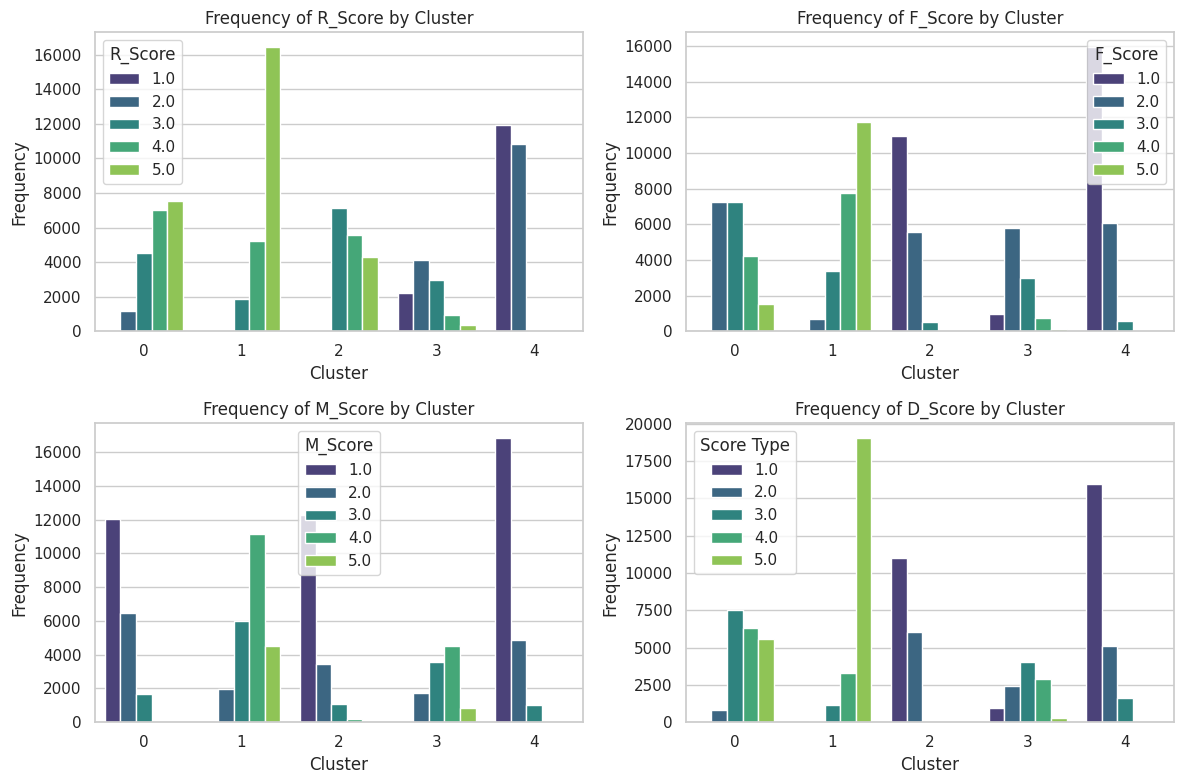

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation based on provided data


# df = complete_agg_df

# Calculate the frequency of R_Scores, F_Scores, M_Scores, and D_Scores for each cluster
frequency_r = complete_agg_df.groupby(['Cluster'])['R_Score'].value_counts().reset_index(name='Frequency')
frequency_f = complete_agg_df.groupby(['Cluster'])['F_Score'].value_counts().reset_index(name='Frequency')
frequency_m = complete_agg_df.groupby(['Cluster'])['M_Score'].value_counts().reset_index(name='Frequency')
frequency_d = complete_agg_df.groupby(['Cluster'])['D_Score'].value_counts().reset_index(name='Frequency')

# Combine the frequency DataFrames
frequency_df = pd.concat([
    frequency_r.assign(Score_Type='R_Score'),
    frequency_f.assign(Score_Type='F_Score'),
    frequency_m.assign(Score_Type='M_Score'),
    frequency_d.assign(Score_Type='D_Score')
]).reset_index(drop=True)

# Set styles for the plots
sns.set(style='whitegrid')

# Plot the frequencies of R_Scores, F_Scores, M_Scores, and D_Scores by Cluster
plt.figure(figsize=(12, 8))

# Create subplots
for i, score_type in enumerate(['R_Score', 'F_Score', 'M_Score', 'D_Score']):
    plt.subplot(2, 2, i + 1)
    score_data = frequency_df[frequency_df['Score_Type'] == score_type]
    sns.barplot(x='Cluster', y='Frequency', hue=score_type, data=score_data, palette='viridis')
    plt.title(f'Frequency of {score_type} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.legend(title='Score Type')
plt.show()

# Frequency of clusters 

In [21]:
# Frequency of clusters
cluster_counts = complete_agg_df['Cluster'].value_counts().sort_index()

# Display the frequency of each cluster
print("Cluster Frequencies:")
print(cluster_counts)

Cluster Frequencies:
Cluster
0    20229
1    23603
2    17052
3    10663
4    22731
Name: count, dtype: int64


# Merge Datasets

combine information from different sources based on a shared key. The following code snippet demonstrates how to perform a left merge in panda 

In [22]:
merged_df = pd.merge(complete_agg_df, df, on='UserID', how='left')

In [23]:
print(merged_df.head())
merged_df.info()

   UserID  Recency  Frequency  Monetary  Duration  R_Score  F_Score  M_Score  \
0       0      360          2    800000       365        3        2        2   
1       1       85          1    150000         0        4        1        1   
2       3      216          7    290000       542        3        3        1   
3       5      434          1  10000000         0        2        1        5   
4      11      824          1    200000         0        1        1        1   

   D_Score  Cluster  Target  Gender ReferralSource AgeCategory StateCategory  
0        4        0       0  Female       Agencies       20-35        Alborz  
1        1        2       0  Female        Website       35-50         Other  
2        4        0       0  Female  Acquaintances       20-35        Tehran  
3        1        3       0    Male        Unknown         50+        Tehran  
4        1        4       0  Female  Acquaintances       20-35        Tehran  
<class 'pandas.core.frame.DataFrame'>
RangeIn

# Statistical Test (chi2)

## Chi-Square Test of Independence

This code performs a Chi-Square test of independence to assess whether there is a significant association between two categorical variables: `Target` and `Gender, Referralsource, Agecategory, Statecategory` in the `merged_df` DataFrame.

### Steps Involved

1. **Creating a Contingency Table**:
   -  As an example I create a contingency table using `pd.crosstab()` to summarize the counts of occurrences for each combination of the `Target` and `Gender` categories.
   ```python
   contingency_table = pd.crosstab(merged_df['Target'], merged_df['Gender'])

## Test on Gender 

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming merged_df is already created from merging the datasets
# Create a contingency table
contingency_table = pd.crosstab(merged_df['Target'], merged_df['Gender'])
row_percentage = contingency_table.div(contingency_table.sum(axis = 1), axis = 0) * 100
print('/nRow percentage')
print(row_percentage)
# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print(chi2)
print(p_value)
# Check the p-value
if p_value < 0.05:
    print("There is a significant difference in age between target and non-target groups.")
else:
    print("There is no significant difference in age between target and non-target groups.")

print(50*'-')
precentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0]+ expected.shape[1])*100
print(precentage_low_expected)
print(50*'-')
# calculate the residuals 
residuals = contingency_table - expected 

print( residuals )
print(50*'-')
# odds ratio 
odds_ratio = (contingency_table.iloc[0,0] / contingency_table.iloc[0,1]) / (contingency_table.iloc[1,0] / contingency_table.iloc[1,1])
print(odds_ratio)

/nRow percentage
Gender    Female      Male
Target                    
0       44.58295  55.41705
1       45.65945  54.34055
Gender  Female   Male
Target               
0        31509  39166
1        10777  12826
8.2462256531836
0.004083682510358042
There is a significant difference in age between target and non-target groups.
--------------------------------------------------
0.0
--------------------------------------------------
Gender      Female        Male
Target                        
0      -190.474427  190.474427
1       190.474427 -190.474427
--------------------------------------------------
0.9574558419354197


## Summary of Results

The analysis of the relationship between `Target` and `Gender` revealed the following key findings:

1. **Row Percentages**:
   - **Non-target group (Target = 0)**: 
     - Female: 44.58%, Male: 55.42%
   - **Target group (Target = 1)**: 
     - Female: 45.66%, Male: 54.34%
   - Both groups show a slightly higher proportion of males, but the difference is minimal.

2. **Contingency Table**:
   - Counts of individuals:
     - **Target = 0**: Female: 31,509, Male: 39,166
     - **Target = 1**: Female: 10,777, Male: 12,826

3. **Chi-Square Test**:
   - **Chi-Square statistic**: 8.25
   - **p-value**: 0.0041
   - **Conclusion**: There is a significant difference in gender distribution between the target and non-target groups at a 5% significance level.

4. **Low Expected Frequencies**:
   - **Percentage of expected frequencies less than 5**: 0.0%, confirming that the Chi-Square test results are reliable.

5. **Residuals**:
   - The observed vs. expected counts show deviations, particularly for both females and males:
     - **For Target = 0**: Female residual: -190.47, Male residual: +190.47
     - **For Target = 1**: Female residual: +190.47, Male residual: -190.47

6. **Odds Ratio**:
   - **Odds ratio**: 0.96, indicating that the odds of being in the target group are very similar for both genders, with only a slight preference for males.

Overall, the results indicate a significant but small association between gender and the target variable, with the gender distribution being relatively balanced across both target groups.

In [25]:
merged_df['NewRefCategory'] = merged_df['ReferralSource'].replace({'Acquaintances': 'Ac-Ag', 'Agencies': 'Ac-Ag'})



# Test on ReferralSource

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming merged_df is already created from merging the datasets
# Create a contingency table
contingency_table = pd.crosstab(merged_df['Target'], merged_df['ReferralSource'])
row_percentage = contingency_table.div(contingency_table.sum(axis = 1), axis = 0) * 100
print('/nRow percentage')
print(row_percentage)
# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print(chi2)
print(p_value)
# Check the p-value
if p_value < 0.05:
    print("There is a significant difference in age between target and non-target groups.")
else:
    print("There is no significant difference in age between target and non-target groups.")

print(50*'-')
precentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0]+ expected.shape[1])*100
print(precentage_low_expected)
print(50*'-')
# calculate the residuals 
residuals = contingency_table - expected 

print( residuals )
print(50*'-')

/nRow percentage
ReferralSource  Acquaintances  Advertisements  Agencies  Application  \
Target                                                                 
0                    7.623629        6.470463  5.828086    25.167315   
1                    6.579672        7.185527  4.876499    23.573275   

ReferralSource  Public Programs       SMS    Unknown   Website  
Target                                                          
0                      0.840467  0.106120  26.546869  27.41705  
1                      0.792272  0.122866  27.216879  29.65301  
ReferralSource  Acquaintances  Advertisements  Agencies  Application  \
Target                                                                 
0                        5388            4573      4119        17787   
1                        1553            1696      1151         5564   

ReferralSource  Public Programs  SMS  Unknown  Website  
Target                                                  
0                           594

## Summary of Results

The analysis of the relationship between `Target` and `ReferralSource` revealed the following key findings:

1. **Row Percentages**:
   - **Non-target group (Target = 0)**: 
     - Acquaintances: 7.62%, Advertisements: 6.47%, Agencies: 5.83%, Application: 25.17%, Public Programs: 0.84%, SMS: 0.11%, Unknown: 26.55%, Website: 27.42%
   - **Target group (Target = 1)**: 
     - Acquaintances: 6.58%, Advertisements: 7.19%, Agencies: 4.88%, Application: 23.57%, Public Programs: 0.79%, SMS: 0.12%, Unknown: 27.22%, Website: 29.65%
   - Variations in the distribution of referral sources between the target and non-target groups are observed, with differences in several categories such as "Advertisements" and "Website."

2. **Contingency Table**:
   - Counts of individuals:
     - **Target = 0**: Acquaintances: 5,388, Advertisements: 4,573, Agencies: 4,119, Application: 17,787, Public Programs: 594, SMS: 75, Unknown: 18,762, Website: 19,377
     - **Target = 1**: Acquaintances: 1,553, Advertisements: 1,696, Agencies: 1,151, Application: 5,564, Public Programs: 187, SMS: 29, Unknown: 6,424, Website: 6,999

3. **Chi-Square Test**:
   - **Chi-Square statistic**: 122.15
   - **p-value**: 2.73e-23
   - **Conclusion**: There is a significant difference in referral sources between the target and non-target groups at a 5% significance level.

4. **Low Expected Frequencies**:
   - **Percentage of expected frequencies less than 5**: 0.0%, indicating that the Chi-Square test results are valid.

5. **Residuals**:
   - The observed vs. expected counts show deviations, particularly for categories such as:
     - **Advertisements**: Positive residuals for the target group and negative residuals for the non-target group.
     - **Application**: Higher than expected in both groups, but more so in the non-target group.
     - **Website**: Negative residuals for the non-target group and positive residuals for the target group.

6. **Potential for Regrouping**:
   - Based on the residuals analysis, the following categories could be considered for regrouping or further investigation:
     - **Acquaintances** and **Agencies**: Both show higher residuals in the non-target group.
     - **Advertisements** and **Public Programs**: These categories demonstrate contrasting behaviors between target and non-target groups.

Overall, the results indicate a significant association between referral sources and the target variable, with noticeable differences in specific categories that suggest potential areas for regrouping and further analysis.

# Test on Agecategory

In [27]:
merged_df['NewAgeCategory'] = merged_df['AgeCategory'].replace({'0-20': '0-35', '20-35': '0-35', '35-50': '35-50+', '50+': '35-50+'})

/tmp/ipykernel_18/3101518335.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  merged_df['NewAgeCategory'] = merged_df['AgeCategory'].replace({'0-20': '0-35', '20-35': '0-35', '35-50': '35-50+', '50+': '35-50+'})


In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming merged_df is already created from merging the datasets
# Create a contingency table
contingency_table = pd.crosstab(merged_df['Target'], merged_df['AgeCategory'])
row_percentage = contingency_table.div(contingency_table.sum(axis = 1), axis = 0) * 100
print('/nRow percentage')
print(row_percentage)
# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print(chi2)
print(p_value)
# Check the p-value
if p_value < 0.05:
    print("There is a significant difference in age between target and non-target groups.")
else:
    print("There is no significant difference in age between target and non-target groups.")

print(50*'-')
precentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0]+ expected.shape[1])*100
print(precentage_low_expected)
print(50*'-')
# calculate the residuals 
residuals = contingency_table - expected 

print( residuals )
print(50*'-')

/nRow percentage
AgeCategory      0-20      20-35      35-50        50+
Target                                                
0            1.796958  53.945525  33.014503  11.243014
1            1.059187  45.223065  36.999534  16.718214
AgeCategory  0-20  20-35  35-50   50+
Target                               
0            1270  38126  23333  7946
1             250  10674   8733  3946
822.9313379890243
4.6012847174620673e-178
There is a significant difference in age between target and non-target groups.
--------------------------------------------------
0.0
--------------------------------------------------
AgeCategory        0-20        20-35       35-50         50+
Target                                                      
0            130.540105  1543.340207 -705.105921 -968.774391
1           -130.540105 -1543.340207  705.105921  968.774391
--------------------------------------------------


## Summary of Results

The analysis of the relationship between `Target` and `AgeCategory` revealed the following key findings:

1. **Row Percentages**:
   - **Non-target group (Target = 0)**: 
     - 0-20 years: 1.80%, 20-35 years: 53.95%, 35-50 years: 33.01%, 50+ years: 11.24%
   - **Target group (Target = 1)**: 
     - 0-20 years: 1.06%, 20-35 years: 45.22%, 35-50 years: 37.00%, 50+ years: 16.72%
   - A higher proportion of individuals in the 20-35 age category is observed in both groups, although the target group has a relatively higher proportion in the 35-50 and 50+ categories.

2. **Contingency Table**:
   - Counts of individuals:
     - **Target = 0**: 0-20 years: 1,270, 20-35 years: 38,126, 35-50 years: 23,333, 50+ years: 7,946
     - **Target = 1**: 0-20 years: 250, 20-35 years: 10,674, 35-50 years: 8,733, 50+ years: 3,946

3. **Chi-Square Test**:
   - **Chi-Square statistic**: 822.93
   - **p-value**: 4.60e-178
   - **Conclusion**: There is a significant difference in age distribution between the target and non-target groups at a 5% significance level.

4. **Low Expected Frequencies**:
   - **Percentage of expected frequencies less than 5**: 0.0%, confirming the validity of the Chi-Square test results.

5. **Residuals**:
   - The observed vs. expected counts show deviations, particularly in the 20-35 and 50+ age categories:
     - **For Target = 0**: 
       - Positive residuals in the 20-35 category (+1,543.34)
       - Negative residuals in the 35-50 and 50+ categories (-705.11 and -968.77, respectively)
     - **For Target = 1**:
       - Negative residuals in the 20-35 category (-1,543.34)
       - Positive residuals in the 35-50 and 50+ categories (+705.11 and +968.77, respectively)

6. **Potential for Regrouping**:
   - Based on the residuals analysis, the following categories could be considered for regrouping or further investigation:
     - **0-35 years**: This group combines the younger age ranges and shows a higher proportion in the non-target group.
     - **35+ years**: This group combines older age ranges and shows a higher proportion in the target group.

Overall, the results indicate a significant association between age categories and the target variable, suggesting areas for potential regrouping and further analysis.

# Test on StateCategory

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming merged_df is already created from merging the datasets
# Create a contingency table
contingency_table = pd.crosstab(merged_df['Target'], merged_df['StateCategory'])
row_percentage = contingency_table.div(contingency_table.sum(axis = 1), axis = 0) * 100
print('/nRow percentage')
print(row_percentage)
# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print(chi2)
print(p_value)
# Check the p-value
if p_value < 0.05:
    print("There is a significant difference in age between target and non-target groups.")
else:
    print("There is no significant difference in age between target and non-target groups.")

print(50*'-')
precentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0]+ expected.shape[1])*100
print(precentage_low_expected)
print(50*'-')
# calculate the residuals 
residuals = contingency_table - expected 

print( residuals )
print(50*'-')

/nRow percentage
StateCategory    Alborz      Other     Tehran
Target                                       
0              5.161655  28.666431  66.171914
1              4.753633  27.852392  67.393975
StateCategory  Alborz  Other  Tehran
Target                              
0                3648  20260   46767
1                1122   6574   15907
13.916533855327009
0.0009507428537072575
There is a significant difference in age between target and non-target groups.
--------------------------------------------------
0.0
--------------------------------------------------
StateCategory     Alborz       Other      Tehran
Target                                          
0              72.194934  144.034982 -216.229916
1             -72.194934 -144.034982  216.229916
--------------------------------------------------


## Summary of Results: State Category Analysis

The analysis explores the relationship between the `StateCategory` and the `Target` variable, revealing significant differences in how individuals are distributed across different state categories.

### Key Findings

1. **Row Percentages**:
   - The row percentages show the distribution of individuals within each state category for both target groups (0 and 1):
     - **Non-target group (Target = 0):**
       - Alborz: 5.16%
       - Other: 28.67%
       - Tehran: 66.17%
     - **Target group (Target = 1):**
       - Alborz: 4.75%
       - Other: 27.85%
       - Tehran: 67.39%
   - The percentages indicate that while Tehran remains the dominant state for both groups, the target group has a slightly higher proportion of individuals from Tehran and a lower proportion from Alborz.

2. **Contingency Table**:
   - The contingency table shows the actual counts of individuals in each state category:
     - **Target = 0:**
       - Alborz: 3,648
       - Other: 20,260
       - Tehran: 46,767
     - **Target = 1:**
       - Alborz: 1,122
       - Other: 6,574
       - Tehran: 15,907
   - These counts illustrate that Tehran has the largest number of individuals in both groups, followed by the "Other" category.

3. **Chi-Square Test Results**:
   - **Chi-Square statistic**: 13.92
   - **p-value**: 0.00095
   - **Conclusion**: Since the p-value is less than the significance level of 0.05, there is a statistically significant difference in state distribution between the target and non-target groups.

4. **Percentage of Low Expected Frequencies**:
   - The percentage of expected frequencies less than 5 is **0.0%**, confirming that the expected frequencies are sufficient, which strengthens the validity of the Chi-Square test results.

5. **Residuals**:
   - The residuals (differences between observed and expected counts) reveal how the actual counts deviate from what would be expected under independence:
     - **For Target = 0:**
       - Alborz: +72.19
       - Other: +144.03
       - Tehran: -216.23
     - **For Target = 1:**
       - Alborz: -72.19
       - Other: -144.03
       - Tehran: +216.23
   - These residuals suggest that the non-target group has more individuals than expected from the "Other" category, while the target group has more individuals than expected from Tehran.

### Conclusion

The analysis shows a significant association between the `StateCategory` and the `Target` variable, indicating differences in state distribution between the target and non-target groups. The most notable deviations occur in the representation of individuals from Tehran, which is more prevalent in the target group, while the "Other" category has a higher representation in the non-target group. These findings suggest potential underlying factors related to geographic location that may influence the target status.

# Decision Tree

## Decision Tree Classifier with Rule Extraction

This code implements a Decision Tree Classifier using scikit-learn to predict a target variable based on categorical features. It also extracts decision rules from the trained model and calculates metrics such as support, confidence, and lift for each rule.

### Key Steps in the Code

1. **Importing Libraries**:
   - The code imports necessary libraries including NumPy, pandas, and scikit-learn modules for decision trees, data preprocessing, and pipelines.

2. **Data Preparation**:
   - The relevant columns (`StateCategory`, `AgeCategory`, `ReferralSource`, `Gender`) are selected from the `merged_df` DataFrame for feature variables (X), and the target variable (`Target`) is assigned to y.

3. **One-Hot Encoding**:
   - A `ColumnTransformer` is created to apply one-hot encoding to the categorical features. This transforms categorical variables into a format suitable for machine learning algorithms.

4. **Training the Decision Tree Classifier**:
   - The `DecisionTreeClassifier` is initialized with specific parameters, including class weights to handle class imbalance. The model is then fitted to the encoded feature set.

5. **Extracting Decision Rules**:
   - A recursive function (`get_decision_rules`) is defined to traverse the decision tree and extract rules that lead to predictions. Each rule consists of conditions based on feature thresholds.

6. **Calculating Rule Metrics**:
   - Another function (`calculate_metrics_for_rule`) calculates support, confidence, and lift for each extracted rule:
     - **Support**: Proportion of the dataset that meets the rule conditions.
     - **Confidence**: Proportion of instances that meet the rule conditions and also belong to the target class.
     - **Lift**: Ratio of the observed confidence to the expected confidence if the target class was randomly distributed.

7. **Storing Rule Metrics**:
   - A DataFrame (`rules_df`) is created to store the extracted rules along with their corresponding metrics. The rules are formatted as strings for better readability.

8. **Displaying the Results**:
   - The maximum column width is set to ensure that long rules are displayed fully in the output. The final DataFrame containing the rules and their metrics is printed.

### Conclusion

This code provides a comprehensive approach to building a decision tree model, extracting interpretable rules, and evaluating those rules using relevant metrics. However, it lacks a train-test split, which is important for assessing the accuracy of the decision tree algorithm. Despite this limitation, the code can still be useful in understanding the decision-making process of the model and deriving actionable insights from the data.

In [30]:
import numpy as np
import pandas as pd
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming merged_df is already loaded

# Select the relevant columns
columns_to_use = ['StateCategory', 'NewAgeCategory', 'ReferralSource', 'Gender']
X = merged_df[columns_to_use]
y = merged_df['Target']

# Create a column transformer with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), columns_to_use)
    ],
    remainder='passthrough'
)

# Transform the features
X_encoded = preprocessor.fit_transform(X)

# Get feature names from the one-hot encoder
feature_names = preprocessor.get_feature_names_out()

# Set class weights to penalize misclassification of the minority class (class 1)
class_weights = {0: 1, 1: 5}  # Adjust the weight for class 1

# Initialize the Decision Tree Classifier with class weights
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', class_weight=class_weights)
clf.fit(X_encoded, y)

# Function to extract rules from the decision tree
def get_decision_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []
    
    def recurse(node, depth, rule=[]):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            rule_left = rule + [f"{name} <= {threshold:.2f}"]
            recurse(tree_.children_left[node], depth + 1, rule_left)
            rule_right = rule + [f"{name} > {threshold:.2f}"]
            recurse(tree_.children_right[node], depth + 1, rule_right)
        else:
            # Get the predicted class for the leaf node
            predicted_class = np.argmax(tree_.value[node])
            # Append the rule with the consequent
            rules.append((rule, predicted_class))
    
    recurse(0, 1)
    return rules

# Extract the decision rules
rules = get_decision_rules(clf, feature_names)

# Function to calculate lift, support, and confidence for each rule
def calculate_metrics_for_rule(df, rule, target_column='Target'):
    subset = df.copy()
    for condition in rule:
        if ' <= ' in condition:
            feature, value = condition.split(' <= ')
            subset = subset[subset[feature] <= float(value)]
        elif ' > ' in condition:
            feature, value = condition.split(' > ')
            subset = subset[subset[feature] > float(value)]
    
    support = len(subset) / len(df)
    if len(subset) > 0:
        confidence = len(subset[subset[target_column] == 1]) / len(subset)
    else:
        confidence = 0
    lift = confidence / (len(df[df[target_column] == 1]) / len(df))
    
    return support, confidence, lift

# Create a DataFrame to store rules, metrics, and consequents
rule_metrics = []

# Add the target variable to the encoded DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X_encoded_df['Target'] = y

for rule, consequent in rules:
    support, confidence, lift = calculate_metrics_for_rule(X_encoded_df, rule)
    rule_metrics.append({
        'Rule': ' AND '.join(rule),
        'Consequent': consequent,  # Add the predicted class as the consequent
        'Support': support,
        'Confidence': confidence,
        'Lift': lift
    })

# Convert the list of dictionaries into a DataFrame
rules_df = pd.DataFrame(rule_metrics)

# Set the maximum column width so that long rules are displayed fully
pd.set_option('display.max_colwidth', None)

# Print the rules DataFrame
#print(rules_df)
rules_df

,Rule,Consequent,Support,Confidence,Lift
0,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website <= 0.50 AND cat__ReferralSource_Agencies <= 0.50 AND cat__StateCategory_Tehran <= 0.50,1,0.115764,0.201851,0.806257
1,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website <= 0.50 AND cat__ReferralSource_Agencies <= 0.50 AND cat__StateCategory_Tehran > 0.50,1,0.222459,0.218805,0.873978
2,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website <= 0.50 AND cat__ReferralSource_Agencies > 0.50 AND cat__StateCategory_Tehran <= 0.50,0,0.004953,0.141328,0.564508
3,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website <= 0.50 AND cat__ReferralSource_Agencies > 0.50 AND cat__StateCategory_Tehran > 0.50,1,0.017650,0.185697,0.741734
4,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website > 0.50 AND cat__StateCategory_Tehran <= 0.50 AND cat__Gender_Male <= 0.50,1,0.030251,0.234222,0.935557
5,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website > 0.50 AND cat__StateCategory_Tehran <= 0.50 AND cat__Gender_Male > 0.50,1,0.042003,0.237374,0.948147
6,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website > 0.50 AND cat__StateCategory_Tehran > 0.50 AND cat__Gender_Male <= 0.50,1,0.047169,0.222847,0.890122
7,cat__NewAgeCategory_35-50+ <= 0.50 AND cat__ReferralSource_Website > 0.50 AND cat__StateCategory_Tehran > 0.50 AND cat__Gender_Male > 0.50,1,0.053491,0.229625,0.917197
8,cat__NewAgeCategory_35-50+ > 0.50 AND cat__ReferralSource_Website <= 0.50 AND cat__Gender_Male <= 0.50 AND cat__ReferralSource_Agencies <= 0.50,1,0.148889,0.294294,1.175504
9,cat__NewAgeCategory_35-50+ > 0.50 AND cat__ReferralSource_Website <= 0.50 AND cat__Gender_Male <= 0.50 AND cat__ReferralSource_Agencies > 0.50,1,0.018318,0.268095,1.070858


# Summary Analysis for Advertisement Campaign Targeting

Based on the decision tree results, here’s a summary of customer characteristics that show high lift and can guide your advertisement campaign strategy for targeting the most valuable customers (classified as target = 1):

## Key Characteristics for High-Lift Campaign Targets

1. **Referral Source: Website + State Category "Other"**:
    - **Rule 12**: Male customers aged above 35-50+, from the "Other" state category, who use the website as their referral source, show a **lift of 1.281** with a confidence of **0.321**.
    - **Rule 13**: Male customers aged above 35-50+, from the "Other" state category, also show a **lift of 1.316** with a confidence of **0.329**.

2. **State Category "Other"**:
    - **Rule 14**: Male customers aged above 35-50+ from the "Other" state category, who use the website as their referral source, show a **lift of 1.307** with a confidence of **0.327**.
    - **Rule 15**: Male customers aged above 35-50+ from the "Other" state category show a **lift of 1.226** with a confidence of **0.307**.

3. **Gender and Age**:
    - **Rule 8**: Male customers aged above 35-50+ who do not rely heavily on website or agency referrals have a **lift of 1.175** with a confidence of **0.294**.

4. **Combination of Referral Source and State Category**:
    - **Rule 13** and **Rule 14** indicate that focusing on male customers aged above 35-50+ who use the website as their primary referral source and reside in the "Other" state category results in high lift and confidence.

## General Patterns for Valuable Customers:

- **Age**: Customers aged 35-50+ show a higher likelihood of being valuable.
- **Gender**: Both male and female customers can be valuable, but the decision tree identifies gender-specific behaviors.
- **Referral Source**: While website referrals play a significant role for older customers, those who don’t rely on the website but fall into other criteria can also be valuable.
- **Location**: Both Tehran and non-major regions like “Other” have valuable customer segments, depending on other characteristics like age and referral source.

## Conclusion:

Valuable customers (those classified as `Target = 1`) tend to be:

- Middle-aged (35-50+).
- More likely to rely on website referrals or be referred through non-standard channels (e.g., not agencies).
- Both male and female, with gender-specific referral patterns.
- Coming from both major cities like Tehran and less prominent regions, depending on their other behaviors.

These insights suggest targeting campaigns focusing on website channels for middle-aged customers and tailoring strategies based on regional differences.